In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import xgboost as xgb
import lightgbm as lgbm
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

['readme.txt', 'RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt', 'test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt', 'train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']


In [3]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [5]:
train=pd.read_csv("./input/train_FD001.txt",sep=" ",names=columns)
test=pd.read_csv("./input/test_FD001.txt",sep=" ",names=columns)
test_results=pd.read_csv("./input/RUL_FD001.txt",sep=" ",header=None)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   op1       13096 non-null  float64
 3   op2       13096 non-null  float64
 4   op3       13096 non-null  float64
 5   sensor1   13096 non-null  float64
 6   sensor2   13096 non-null  float64
 7   sensor3   13096 non-null  float64
 8   sensor4   13096 non-null  float64
 9   sensor5   13096 non-null  float64
 10  sensor6   13096 non-null  float64
 11  sensor7   13096 non-null  float64
 12  sensor8   13096 non-null  float64
 13  sensor9   13096 non-null  float64
 14  sensor10  13096 non-null  float64
 15  sensor11  13096 non-null  float64
 16  sensor12  13096 non-null  float64
 17  sensor13  13096 non-null  float64
 18  sensor14  13096 non-null  float64
 19  sensor15  13096 non-null  float64
 20  sensor16  13096 non-null  fl

In [8]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [9]:
print('Unique ID: ',train.id.unique())

Unique ID:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


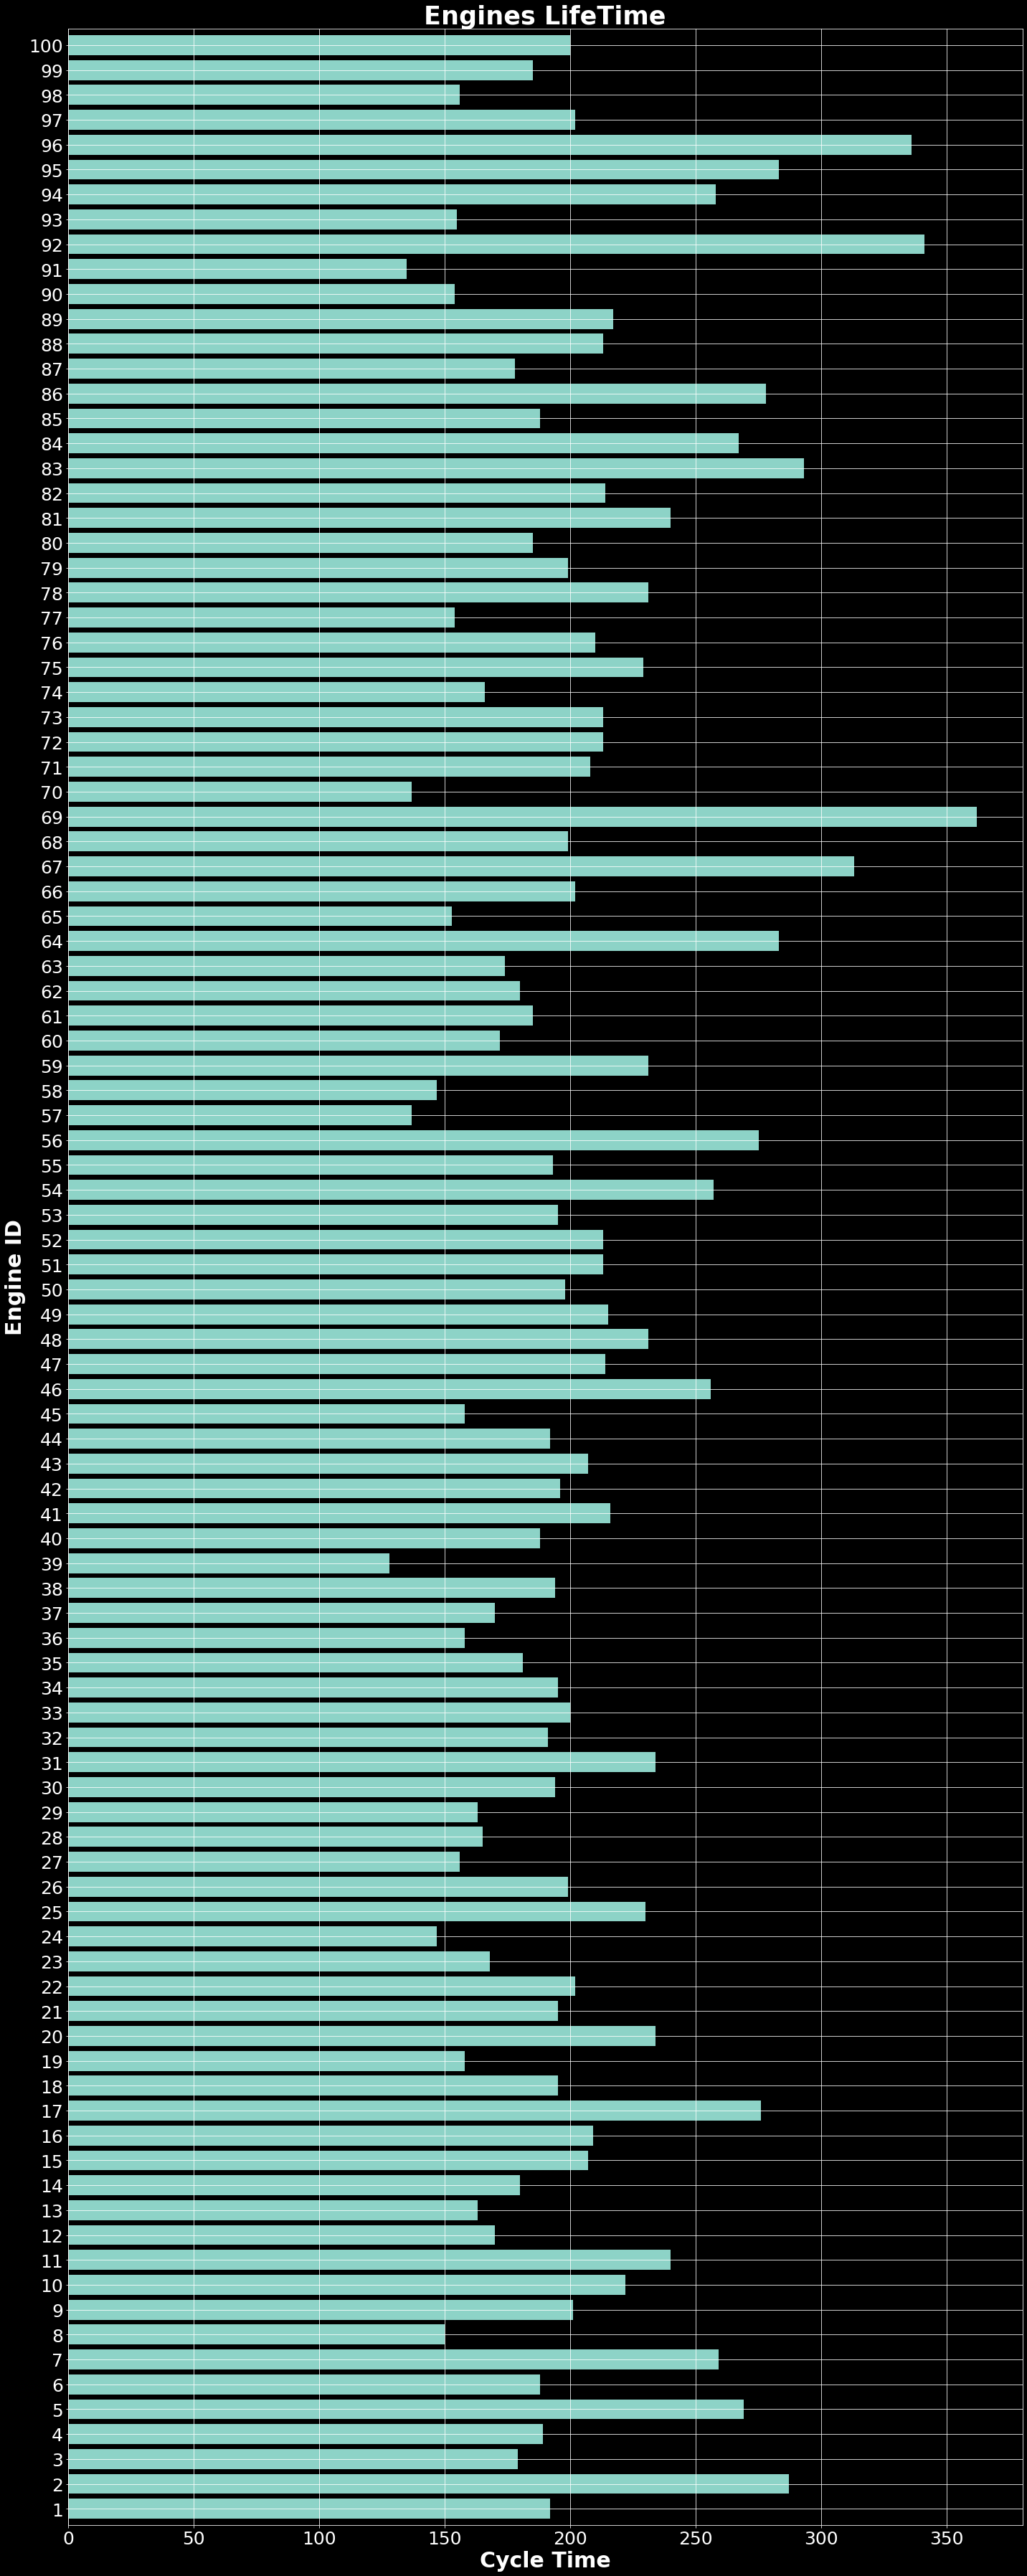

In [11]:
plt.style.use('dark_background')
plt.figure(figsize=(20,50))
ax=train.groupby('id')['cycle'].max().plot(kind='barh',width=0.8, stacked=True,align='center',rot=0)
plt.title('Engines LifeTime',fontweight='bold',size=35)
plt.xlabel('Cycle Time',fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
test_results.columns=["rul","null"]
test_results.head()

,rul,null
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [13]:
test_results.drop(["null"],axis=1,inplace=True)
test_results['id']=test_results.index+1
test_results.head()

,rul,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [14]:
rul = pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']

In [15]:
rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [16]:
test_results['rul_failed']=test_results['rul']+rul['max']
test_results.head()

,rul,id,rul_failed
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [17]:
test_results.drop(["rul"],axis=1,inplace=True)

In [18]:
test=test.merge(test_results,on=['id'],how='left')

In [19]:
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,rul_failed,remaining_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN,143,138


In [20]:
test.isnull().sum()

id                     0
cycle                  0
op1                    0
op2                    0
op3                    0
sensor1                0
sensor2                0
sensor3                0
sensor4                0
sensor5                0
sensor6                0
sensor7                0
sensor8                0
sensor9                0
sensor10               0
sensor11               0
sensor12               0
sensor13               0
sensor14               0
sensor15               0
sensor16               0
sensor17               0
sensor18               0
sensor19               0
sensor20               0
sensor21               0
sensor22           13096
sensor23           13096
rul_failed             0
remaining_cycle        0
dtype: int64

In [21]:
df_train=train.drop(["sensor22","sensor23"],axis=1)
df_test=test.drop(["sensor22","sensor23"],axis=1)

In [22]:
df_test.drop(["rul_failed"],axis=1,inplace=True)
df_test.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21',
       'remaining_cycle'],
      dtype='object')

In [23]:
df_train['remaining_cycle'] = df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']

In [24]:
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [25]:
cycle=30
df_train['label'] = df_train['remaining_cycle'].apply(lambda x: 1 if x <= cycle else 0)
df_test['label'] = df_test['remaining_cycle'].apply(lambda x: 1 if x <= cycle else 0)

In [26]:
op_set=["op"+str(i) for i in range(1,4)]
sensor=["sensor"+str(i) for i in range(1,22)]

In [27]:
test.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

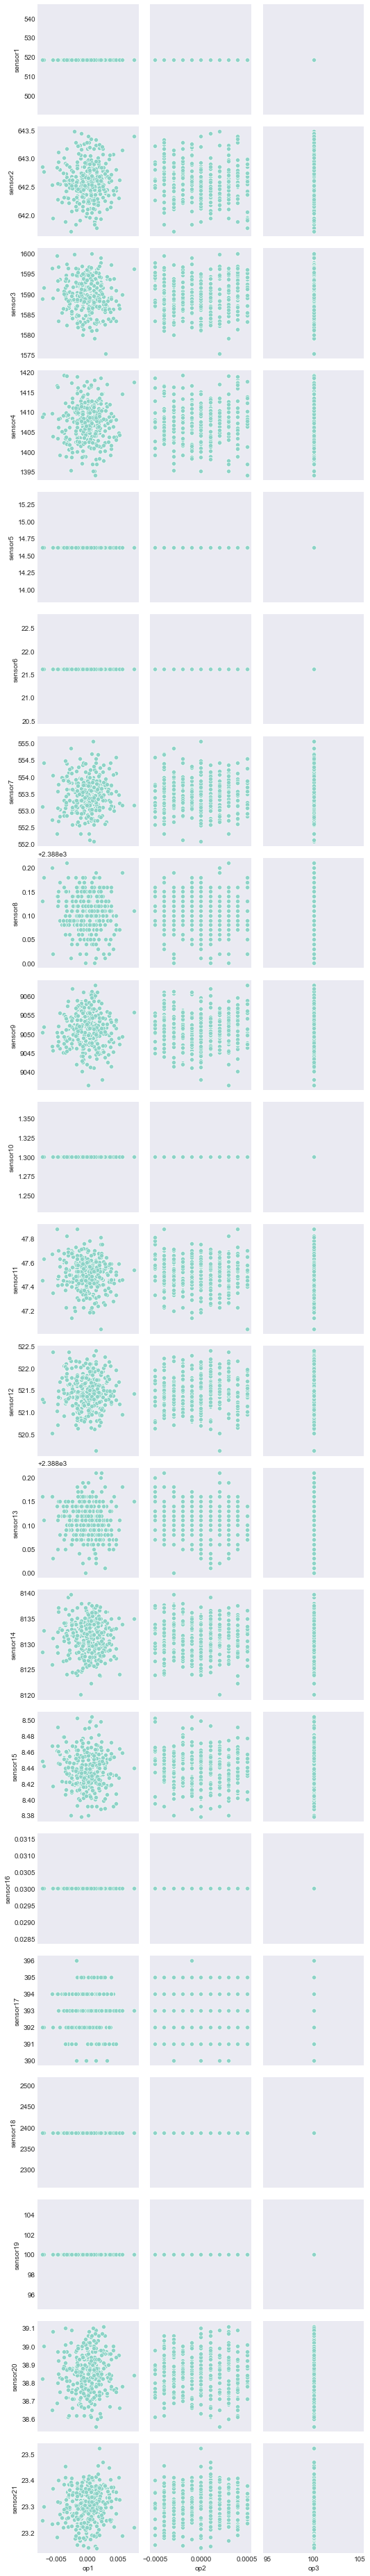

In [28]:
plt.style.use('seaborn-dark')
ax=sb.pairplot(test.query("cycle"),x_vars=op_set,y_vars=sensor,palette="husl")

In [29]:
df_train.label.unique()

array([0, 1], dtype=int64)

In [30]:
df_test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle,label
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138,0


In [31]:
df_test.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21',
       'remaining_cycle', 'label'],
      dtype='object')

In [32]:
df_test.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19"],axis=1,inplace=True)

In [33]:
df_test.label.unique()

array([0, 1], dtype=int64)

In [34]:
x=df_train.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19","remaining_cycle","label"],axis=1)
y=df_train.label
print('x shape : ',x.shape)
print('y shape : ',y.shape)

x shape :  (20631, 16)
y shape :  (20631,)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=3)
# gc.collect()  
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (16504, 16)
X_test shape :  (4127, 16)
y_train shape :  (16504,)
y_test shape :  (4127,)


In [37]:
import lightgbm as lgb
lgb_clss = lgb.LGBMClassifier(learning_rate=0.01,n_estimators=5000,num_leaves=100,objective='binary', metrics='auc',random_state=50,n_jobs=-1)
lgb_clss.fit(X_train, y_train)
lgb_clss.score(X_test, y_test)
preds2 = lgb_clss.predict(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))

Acc Score:  0.9590501574993943
Roc Auc Score:  0.9060580941333771
Precision Score:  0.8869565217391304
Recall Score:  0.8306188925081434
f1 score:  0.8578637510513035


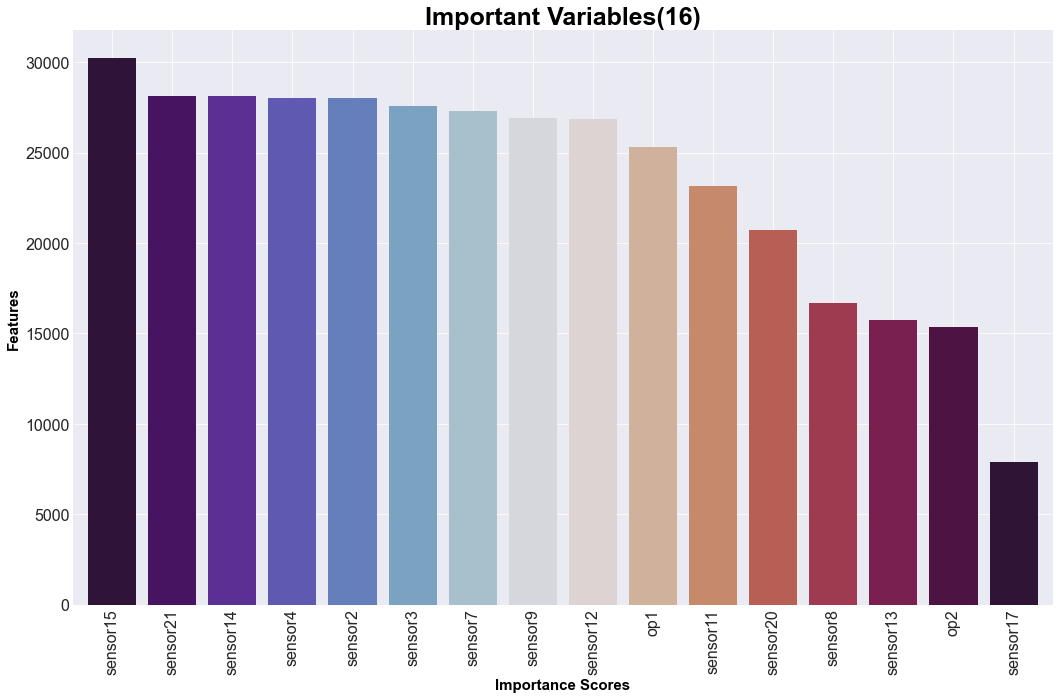

In [38]:
colors = [plt.cm.twilight_shifted(i/float(len(x.columns)-1)) for i in range(len(x.columns))]
columns_X_train=x.columns.tolist()
X_train=pd.DataFrame(X_train)
X_train.set_axis(columns_X_train, axis=1, inplace=True)
feat_importances = pd.Series(lgb_clss.feature_importances_, index=X_train.columns)
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 16})
plt.title('Important Variables(16)',color='black',fontweight='bold',size=25)
feat_importances.nlargest(16).plot(kind='bar', color=colors, width=0.8, align='center')
plt.ylabel('Features',color='black',fontweight='bold',size=15)
plt.xlabel('Importance Scores',color='black',fontweight='bold',size=15)
plt.tight_layout()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Variables')

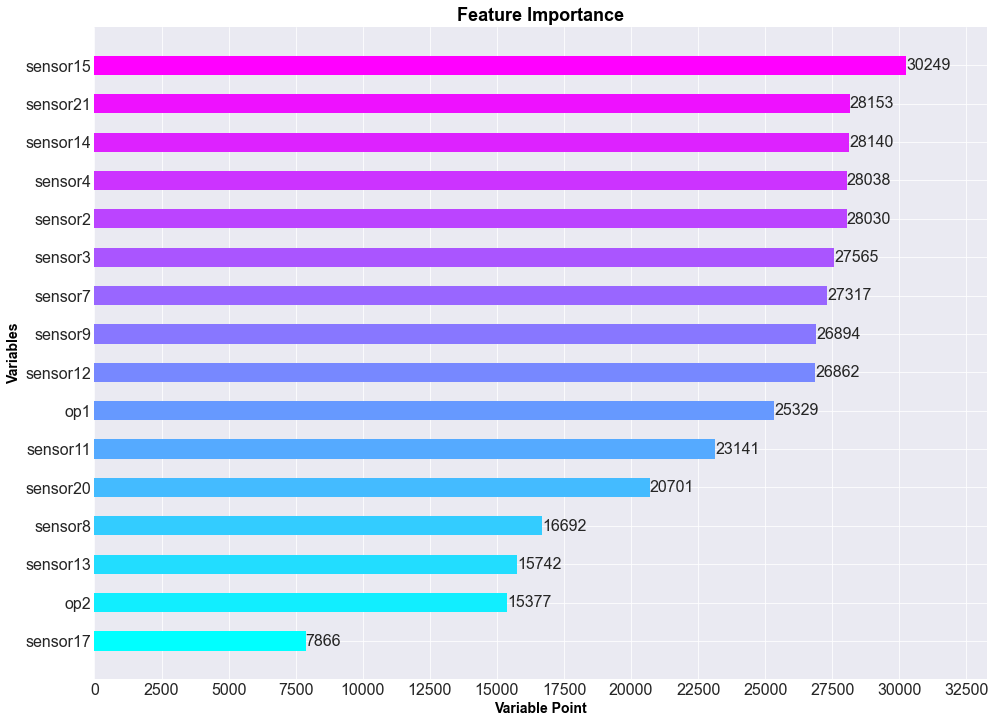

In [39]:
colors = [plt.cm.cool(i/float(len(x.columns)-1)) for i in range(len(x.columns))]
ax = lgb.plot_importance(lgb_clss, max_num_features=16,figsize=(16,12),height=0.5,color=colors)
ax.set_title('Feature Importance',color='black',fontweight='bold',size=18)
ax.set_xlabel('Variable Point',color='black',fontweight='bold',size=14)
ax.set_xticks(np.arange(0,32501,2500))
ax.set_ylabel('Variables',color='black',fontweight='bold',size=14)

In [40]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
stf_kf=StratifiedKFold(n_splits=5)
import xgboost as xgb
xgb_classifier=xgb.XGBClassifier(n_estimators=725,n_jobs=-1)
params={
         'learning_rate': np.arange(0.01, 0.11, 0.025),
         'max_depth': np.arange(1, 10, 1),
         'min_child_weight': np.arange(1, 10, 1), 
         'subsample': np.arange( 0.7, 1, 0.05), 
         'gamma': np.arange(0.5, 1, 0.1), 
         'colsample_bytree': np.arange( 0.1, 1, 0.05), 
         'scale_pos_weight': np.arange( 20, 200, 10)}
rs_cv_classifier=RandomizedSearchCV(xgb_classifier,param_distributions=params,cv=stf_kf,n_jobs=-1)
rs_cv_classifier.fit(X_train,y_train)
y_pred=rs_cv_classifier.predict(X_test)
print("Best Parameter: \n",rs_cv_classifier.best_params_)
print("XGBClassifier Acc Score: ",accuracy_score(y_pred,y_test))

Best Parameter: 
 {'subsample': 0.8, 'scale_pos_weight': 190, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.060000000000000005, 'gamma': 0.7999999999999999, 'colsample_bytree': 0.7500000000000002}
XGBClassifier Acc Score:  0.9486309668039739


In [41]:
df_test_pred = rs_cv_classifier.predict(df_test.drop(['remaining_cycle','label'],axis=1))
cm=confusion_matrix(df_test.iloc[:,-1], df_test_pred, labels=None, sample_weight=None)

In [42]:
print("Test Accuracy Score: ", accuracy_score(df_test.iloc[:,-1],df_test_pred))

Test Accuracy Score:  0.9803756872327428


<AxesSubplot:>

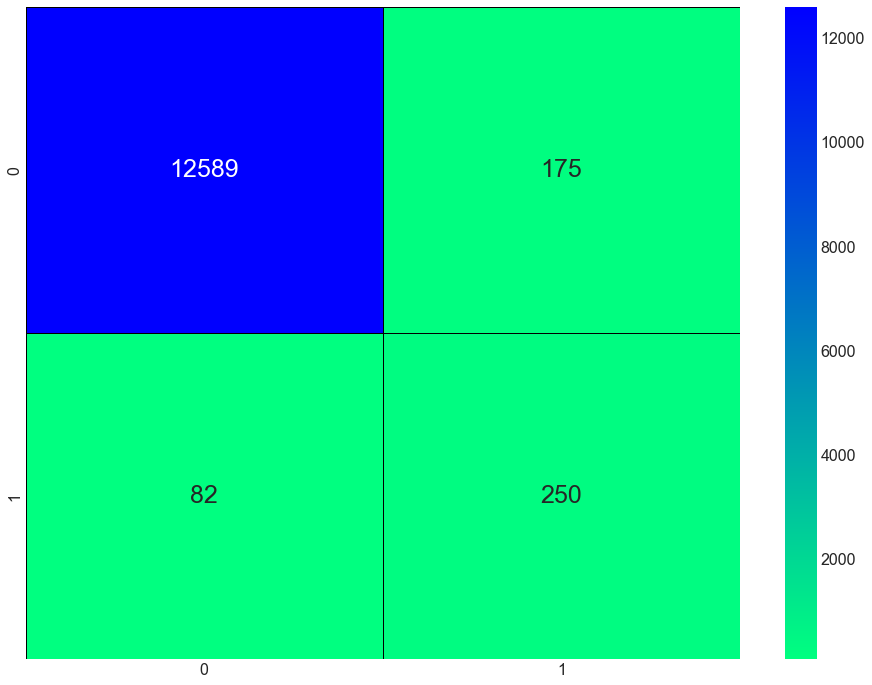

In [43]:
plt.figure(figsize=(16,12))
sb.heatmap(cm,annot=True,annot_kws={"size": 25},linewidths=0.7,linecolor="black",cmap="winter_r",fmt="d")

In [44]:
#end